# 좋은 코너점을 찾으려면
> edge를 찾을 때
- 단순히 threshold만드로 찾으면 코너점이 많이 나옴
- 대표적인 코너값을 찾기위해서는
- 주변보다 상대적으로 값이 작거나, 크거나 -> haris coner
- Non Maximum supression문제와 연결됨.
- 절대값으로 찾으면 안됨
- 주변보다 상대적을 낮은지점, 높은 지점을 찾아야 함.
- 윈도우의 크기에 따라 달라짐 -> 

### NMSThreshod값의 개념
- 근처에 있는 점들을 같은 것으로 볼 것인가, 아닌 것으로 볼 것인가


# computer vision
## 1. semantic Segmentation
- 각 픽셀이 어디에 속하는지 결정(sky, trees, cat, grass)
- 개가 2마리 있으면 모두 빨간색
- 소는 모두 소 (소와 소를 구분하지 않음.)
> 슬라이딩 윈도우 
- full image를 픽셀 단위(extra patch단위)로 가면서 소인지, 잔디인지 구분


## 2. classification
- 분류

## 3. object detection
- 분류 + 위치

## 4. instan
ce Segmdntation
- 개과 개를 구분함.
- segmantation 이후 : 포즈까지 연결

# yolo
> dark net
- C로 구현
- dark net 위에 yolo를 얹어서 detection을 만듦.
- darkflow: tensorflow 기반

## 1. 기존의 방법

### opencv 알고리즘
- 서프, shift, ORB 등의 특징점은 꼭 맞는 트징점만 찾아야 함
- 도메인 마다 풀어야 하는 문제가 다르기 때문에, 보편적인 문제에는 적용할 수 없음.

### sliding window
> scaning
- 기존의 rcnn이 시간이 오래 걸린 이유
- 모든 이미지의 픽셀을 돌아다니면서

### R-CNN
- 전체 영상에서 10만개를 모두 검색하지 못하니까
- 오브젝트가 있을만한 위치를 찾아서 그 부분만 검색

> regine proposal
- 수백개의 이미지 후보를 생성하고 각가에 대하여 분류


## 2. 욜로
- 격자 그리드로 나누어 한 번에 클래스를 판단하고 이를 통합해 최종 객체를 구분
- 격자를 중심으로 고양이인지 아닌지 판단하기
- 이미지 픽셀 좌표에 대응되는 bounging box를 찾음
- 이에 대한 class확률을 구하는 single regression problem으로 해결


> 센터를 중심으로
- bounding box의 크기를 예측하기

> 구성
-  이미지를 S * S grid로 분할하기(v1: 7*7, v2: 13*13)
- cell은 B개의 bounding box와 각 개체 존제에 대한 confidence score로 구성
- cell: C개의 클래스 확률로 구성 박스
- 마지막 predicion layer :  S * S * (B * 5 + c)사이즈가 됨

> 셀구성
- t: 셀에 대한 정보(x, y, w, h), 센터 좌표 => box co ordinates
- P0: 오브젝트가 있을 확률 => objectness score
- p1~: 각 셀마다 class별 확률값 구하기=> class score
- p0이 낮으면 p1~도 낮음. 
- 각 셀당 B개만큼 유지

> 과정
- 이미지를 7  7로 나누기
- confidence: 오브젝트일 확률
- bounding box : 위치 정보 -> 2,3가지로 예측 , 각 셀마다 갖고 있음.
- 각 셀마다 bounding box를 갖고 있고, 각 클래스마다 confidence를 갖고 있음.
- 각각의 나온 box에서 confidence를 기준으로 낮은 값은 제거해야 함.


> sliding window문제 해결
>> sliding window기법
- window가 지나가면서 모든 윈도우에서 얼굴을 검출하므로 bonding box가 굉장히 많이 나오므로, 하나로 합치는 작업 필요
- 찾은 bonding box의 grouping 하는 작업(평균) 필요
- 단순 평균으로는 쉽지 않음....(얼굴의 일부만 된 경우. 두 얼굴이 맞붙은 경우

> yolo: nn maximum suppression
- confidence가 낮은 값은 버려도, bounding box가 굉장히 많이 나옴
- 유사한 box 끼리는 합치는 작업 필요
- 같은 클래스일때 근접해 있는 박스끼리 합치기

> 적합한 bounding box를 찾는 작업을 3번함(v3)
- 13 * 13
- 16 * 16
- 52 * 52

## REGRESSION
- 셀마다 대응되는 BOUNDING BOX를 찾는것
- 분류가 아니라
- 이 패치가 주어졌을 때 BOUNDING BOX를 얼마로 해야하지? REGRESSION문제










  
# 리눅스에서 실행하기
- 소스코드를 다운받아서 컴파일하기

#### 1. clone
- git clone https://github.com/pjreddie/darknet
#### 2. gpu 사용하기
- vi Makefile
- gpu = 1
- CUDNN = 1
- OPENCV = 1

#### 편집기 모드
- vi : vi 연습가능
- esc: 명령어 모드
- a  / i: editor 모드
- 붙여넣기: 윈도우에서 복사한뒤(ctrl + c) + ctrl + v
- 저장: esc(명령어 모드 ) -> :wq (:- command mode, w- write, q - quit)
- 강제 종료: !q

#### 3. 컴파일하기
- make
- make : 파일 간의 종속관계를 파악하여 Makefile( 기술파일 )에 적힌 대로 컴파일러에 명령하여 SHELL 명령이 순차적으로 실행될 수 있게 합니다.

#### 4. activate
- conda activate tensorflow2_p36

#### 5. weight 가져오기
-  wget https://pjreddie.com/media/files/yolov3.weights

#### 6. 실행하기
-./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

#### 7. 결과 저장
- predictions.jpg



# yolo test

### yolo 결과 3개 나옴
> 첫번째 실행후 행렬 shape:507*85
- 507 = 13 * 13 * 3(boounding box가 3개(v3는 3개, v2는 2개)
- 85 = class 확률 + (cx, c6, w, h, conf)
- class개수: 80개

> 두 번째 실행 후 행렬: 2028 * 85
- 2028 = 26 * 26 * 3

> 세번째 실행 후 행렬: : 8112 * 85
- 8112 = 52 * 52 * 3

In [13]:
import cv2 
import argparse
import numpy as np
import os.path
from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [ ]:
# Initialize the parameters
confThreshold = 0.5  #Confidence threshold-> 낮은 값은 제거
nmsThreshold = 0.4   #Non-maximum suppression threshold-> 거리가 가까우면 같은 class으로 봄
# 모든 이미지를 416 * 416으로 변환
inpWidth = 416       #Width of network's input image
inpHeight = 416      #Height of network's input image


# Load names of classes
classesFile = "coco.names" 
classes = None
with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')
print(classes)


# yolo는 독자적인 파일을 사용함(옛날형식으로 )
# Give the configuration and weight files for the model and load the network using them.
modelConfiguration = "yolov3.cfg"  # network 구조 정보
modelWeights = "yolov3.weights"

In [24]:
 "yolov3.cfg" 파일 안에
'''
[convolutional]
size=1
stride=1
pad=1
filters=255
activation=linear

[yolo]
mask = 6,7,8
anchors = 10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326
classes=80
num=9
jitter=.3
ignore_thresh = .7
truth_thresh = 1
random=1
'''

 바꿀부분; 4군데
- classes 부분(3군데임), filters=255부분(공식이 있음.)

SyntaxError: invalid syntax (<ipython-input-24-48103b584a8e>, line 1)

# 1. 모델 만들기
> 서버 베이스
- 텐서플로우, 케라스 멀 쓰든 상관없음

> 클라이언트 베이스
- 학습된 모델을 읽어와서 opencv로 입혀서 사용

In [4]:
net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# 2. 함수 이해
## 2.1 모든 layer의 이름 출력 함수

> 출력 레이어
- 연결되지 않은레이어
- 마지막 레이어
- 욜로는 출력 레이어가 3개임!!!!!!

> 찾는 방법
- 레이어 이름으로 찾아도 되고
- 연결되지 않은 레이어 찾기

In [216]:
# Get the names of the output layers
def getOutputsNames(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [217]:
# 모든 레이어 이름 출력
l = net.getLayerNames()
len(l)  # activation까지 1개로 보면 백여개 정도의 layer

254

In [218]:
# 연결되지 않은 레이어 출력-> 레이어 index가 출력됨.
for i in net.getUnconnectedOutLayers():
    print(i, i[0])

[200] 200
[227] 227
[254] 254


In [219]:
# 1을 빼는 이유: 인덱스가 1부터 시작하기 때문
for i in net.getUnconnectedOutLayers():
    print(l[i[0]-1])

yolo_82
yolo_94
yolo_106


- 빠른 성능을 원하면 yolo_82 결과만 갖고 사용해도 됨

## 2.2 Draw the predicted bounding box

In [220]:
# Draw the predicted bounding box
def drawPred(classId, conf, left, top, right, bottom):
    # Draw a bounding box.
    cv2.rectangle(frame, (left, top), (right, bottom), (255, 178, 50), 3)
    
    # 출력할 확률값
    label = '%.2f' % conf 
        
    # Get the label for the class name and its confidence
    if classes:
        assert(classId < len(classes))
        label = '%s:%s' % (classes[classId], label)

    #Display the label at the top of the bounding box
    # labelSize; 폰트 크기
    # baseLine: 영어에서 g에서 o아래 줄
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    cv2.rectangle(frame, (left, top - round(1.5*labelSize[1])), (left + round(1.5*labelSize[0]), top + baseLine), (255, 255, 255), cv2.FILLED)
    cv2.putText(frame, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1)

## 2.3.  Remove the bounding boxes with low confidence using non-maxima suppression

In [221]:
# Remove the bounding boxes with low confidence using non-maxima suppression
def postprocess(frame, outs):
    frameHeight = frame.shape[0]# 높이(행)
    frameWidth = frame.shape[1]# 폭(열)

    # Scan through all the bounding boxes output from the network and keep only the
    # ones with high confidence scores. Assign the box's class label as the class with the highest score.
    classIds = []
    confidences = []
    boxes = []
    # 출력 레이어 3개 -> 3번 돌기
    for out in outs:
        # all bounding box돌기
        for detection in out:
            # 80개의 확률값
            scores = detection[5:]
            # 인덱스 번호 
            classId = np.argmax(scores)
            confidence = scores[classId]
            
            # confidence가 0.5보다 큰 경우만 저장
            if confidence > confThreshold:
                # normalize되어 있으므로 원래되로 복원
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    # Perform non maximum suppression to eliminate redundant overlapping boxes with
    # lower confidences.
    # Non Maximum Surpression 과정
    # 같은 객체면 합치고 아니면 제거(거리, class ID를 함게 봐야 함.)
    # 여기서는 classID를 고려하지는 않음.
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    
    
    for i in indices:
        i = i[0]
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        drawPred(classIds[i], confidences[i], left, top, left + width, top + height)

In [222]:
# 디버깅
detection=outs[0][0]
scores = detection[5:]
# 인덱스 번호 
classId = np.argmax(scores)
print(classId) # 일단 사람이라고 인식
confidence = scores[classId]
print(confidence)

0
0.0


# 3.  test

## 3.1. 강아지 사진

In [269]:
cap = cv2.VideoCapture('images/dog2.jpg')

hasFrame, frame = cap.read()

#inpWidth =  frame.shape[1]
#inpHeight = frame.shape[0]
# 여기서 inpWidth는 영상의 크기가 아님.
blob = cv2.dnn.blobFromImage(frame, # numpy형식으로 여러개 넣어줘도 됨
                             1/255,  # 정규화해야 됨
                             (inpWidth, inpHeight), 
                             [0,0,0], #픽셀의 평균값. 
                             1, # True(NCHW), False값(NHWC): channel first/ last
                             # swaRB: RGB, BGR여부, opencv에서는 True로 바꿔야함.
                             # darknet: RGB, opencv : BGR
                             crop=False)

# blob결과: 정규화했으므로 실수값
blob.shape
# 이미지 개수, 채널 개수, 이미지 크기

(1, 3, 416, 416)

In [270]:
net.setInput(blob)

# prediction, forward, 계산 과정
outs = net.forward(getOutputsNames(net))
# 첫번째 output만 사용해서 빨리 사용하고 싶을 때 
# outs = net.forward('yolo_82')

In [253]:
len(outs)
# output 결과가 3개 층이기 때문에 결과도 3개-> bounding box의 개수
print(outs[0].shape  ) # 507개의 bounding box
print(outs[1].shape)  # 2028개의 bounding box
print(outs[2].shape) # 8112개의 bounding box

(507, 85)
(2028, 85)
(8112, 85)


- 첫번재 output의 첫번째 bounding box 정보

# 레이어를 3개 쓰는 이유
- 레이어를 하나로 쓰면 검출 될수도 있고, 안될수도 있으니까
- 여러가지 스케일로 보면서 객체가 검출될 수 있도록 하기

In [225]:
outs[0][0].shape

(85,)

In [226]:
outs[0][0]

# 앞의 4개는 첫번째 셀에 대한 bounding box 정보 
# 5번째: object일 확률 = 0 -> 거의 배경일 가능성이 높음.
# 나머지; confidence
# 정규화되어 있음.

array([3.5932451e-02, 4.4414859e-02, 3.9161631e-01, 1.3570079e-01,
       2.3258364e-08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [227]:
# 많은 bounding box 중 같은것끼리 합치기
postprocess(frame, outs)

t, _ = net.getPerfProfile()
label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
cv2.putText(frame, label, (0, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

array([[[ 40,  93,  60],
        [ 38,  88,  56],
        [ 33,  83,  51],
        ...,
        [ 20,  50,  25],
        [ 18,  48,  23],
        [ 18,  48,  23]],

       [[ 41,  94,  61],
        [ 40,  90,  58],
        [ 34,  84,  52],
        ...,
        [ 20,  50,  25],
        [ 19,  49,  24],
        [ 19,  49,  24]],

       [[ 43,  97,  62],
        [ 39,  93,  58],
        [ 36,  86,  54],
        ...,
        [ 19,  51,  26],
        [ 21,  51,  26],
        [ 21,  51,  26]],

       ...,

       [[194, 188, 181],
        [196, 190, 183],
        [193, 189, 184],
        ...,
        [207, 203, 202],
        [211, 206, 203],
        [209, 204, 201]],

       [[193, 187, 180],
        [197, 191, 184],
        [196, 190, 185],
        ...,
        [203, 199, 198],
        [203, 198, 195],
        [202, 197, 194]],

       [[196, 188, 181],
        [202, 194, 187],
        [199, 193, 188],
        ...,
        [203, 198, 197],
        [200, 193, 190],
        [199, 192, 189]]

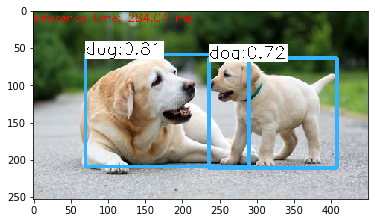

In [228]:
imshow('', frame)

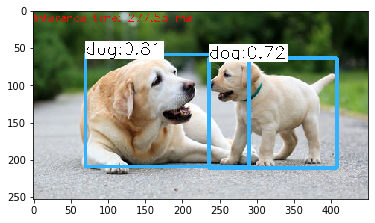

In [23]:
cv2.imwrite("./images/dog3.png", frame) 
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## 3.2. car 사진

In [87]:
cap = cv2.VideoCapture('images/cars.jpg')

hasFrame, frame = cap.read()

#inpWidth =  frame.shape[1]
#inpHeight = frame.shape[0]
# 여기서 inpWidth는 영상의 크기가 아님.
blob = cv2.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop=False)

net.setInput(blob)

outs = net.forward(getOutputsNames(net))

postprocess(frame, outs)

t, _ = net.getPerfProfile()
label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
cv2.putText(frame, label, (0, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

array([[[241, 230, 219],
        [241, 230, 219],
        [241, 230, 219],
        ...,
        [108, 142, 147],
        [102, 136, 141],
        [ 98, 132, 137]],

       [[241, 230, 219],
        [241, 230, 219],
        [241, 230, 219],
        ...,
        [ 96, 130, 135],
        [ 89, 123, 128],
        [ 85, 119, 124]],

       [[241, 230, 219],
        [241, 230, 219],
        [241, 230, 219],
        ...,
        [ 80, 108, 114],
        [ 73,  98, 105],
        [ 70,  95, 102]],

       ...,

       [[ 76,  88,  99],
        [ 76,  88,  99],
        [ 75,  89,  99],
        ...,
        [ 96,  92,  97],
        [ 96,  92,  97],
        [ 96,  92,  97]],

       [[ 78,  90, 101],
        [ 77,  89, 100],
        [ 76,  90, 100],
        ...,
        [ 95,  91,  96],
        [ 96,  92,  97],
        [ 96,  92,  97]],

       [[ 79,  91, 102],
        [ 78,  90, 101],
        [ 76,  90, 100],
        ...,
        [ 95,  91,  96],
        [ 95,  91,  96],
        [ 96,  92,  97]]

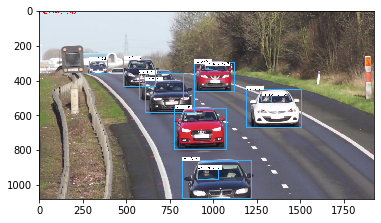

In [88]:
cv2.imwrite("out.jpg", frame) 
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# 4. 첫번째 output 에서의 box 그리기

In [96]:
import cv2 as cv
import argparse
import numpy as np
import os.path
from matplotlib import pyplot as plt
%matplotlib inline


In [97]:
# Initialize the parameters
confThreshold = 0.5  #Confidence threshold
nmsThreshold = 0.4   #Non-maximum suppression threshold
inpWidth = 416       #Width of network's input image
inpHeight = 416      #Height of network's input image

# Load names of classes
classesFile = "coco.names"
classes = None
with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')
print(classes)
# Give the configuration and weight files for the model and load the network using them.
modelConfiguration = "yolov3.cfg"
modelWeights = "yolov3.weights"

net = cv.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [114]:
# Get the names of the output layers
def getOutputsNames(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Draw the predicted bounding box
def drawPred(classId, conf, left, top, right, bottom):
    # Draw a bounding box.
    cv.rectangle(frame, (left, top), (right, bottom), (255, 178, 50), 3)
    
    label = '%.2f' % conf
        
    # Get the label for the class name and its confidence
    if classes:
        assert(classId < len(classes))
        label = '%s:%s' % (classes[classId], label)

    #Display the label at the top of the bounding box
    labelSize, baseLine = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    cv.rectangle(frame, (left, top - round(1.5*labelSize[1])), (left + round(1.5*labelSize[0]), top + baseLine), (255, 255, 255), cv.FILLED)
    cv.putText(frame, label, (left, top), cv.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1)

# Remove the bounding boxes with low confidence using non-maxima suppression
def postprocess(frame, outs):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    # Scan through all the bounding boxes output from the network and keep only the
    # ones with high confidence scores. Assign the box's class label as the class with the highest score.
    classIds = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            classId = np.argmax(scores)
            confidence = scores[classId]
            if confidence > confThreshold:
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])
    cv.rectangle(frame, (left, top), (right, bottom), (255, 178, 50), 3)


In [124]:
cap = cv.VideoCapture('./images/cars.jpg')

hasFrame, frame = cap.read()

#inpWidth =  frame.shape[1]
#inpHeight = frame.shape[0]
# 여기서 inpWidth는 영상의 크기가 아님.
blob = cv.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop=False)

# data 넣기
net.setInput(blob)

# 계산, predict
outs = net.forward('yolo_82')
outs.shape

(507, 85)

In [127]:
def draw_roundbox(frame, outs):
    frameHeight = frame.shape[0]# 높이(행)
    frameWidth = frame.shape[1]# 폭(열)

    # Scan through all the bounding boxes output from the network and keep only the
    # ones with high confidence scores. Assign the box's class label as the class with the highest score.
    classIds = []
    confidences = []
    boxes = []
    # 출력 레이어 3개 -> 3번 돌기
    
    for detection in outs:
        # 80개의 확률값
        scores = detection[5:]
        # 인덱스 번호 
        classId = np.argmax(scores)
        confidence = scores[classId]

        # confidence가 0.5보다 큰 경우만 저장
        if confidence > 0.3:
            center_x = int(detection[0] * frameWidth)
            center_y = int(detection[1] * frameHeight)
            width = int(detection[2] * frameWidth)
            height = int(detection[3] * frameHeight)
            left = int(center_x - width / 2)
            right = int(center_x + width / 2)

            top = int(center_y - height / 2)
            bottom = int(center_y + height / 2)

            classIds.append(classId)
            confidences.append(float(confidence))
            boxes.append([left, top, width, height])
    frame2 = frame.copy()
    cv.rectangle(frame2, (left, top), (right, bottom), (255, 178, 50), 3)
    return frame2

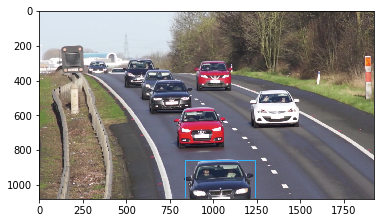

In [128]:
frame2 = draw_roundbox(frame, outs)
imshow('', frame2)

# 5. crop

In [257]:
import cv2 as cv
import argparse
import numpy as np
import os.path
from matplotlib import pyplot asimport cv2 as cv
import argparse
import numpy as np
import os.path
from matplotlib import pyplot as plt
%matplotlib inline


# Initialize the parameters
confThreshold = 0.5  #Confidence threshold
nmsThreshold = 0.4   #Non-maximum suppression threshold
inpWidth = 416       #Width of network's input image
inpHeight = 416      #Height of network's input image

# Load names of classes
classesFile = "coco.names"
classes = None
with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')
print(classes)
# Give the configuration and weight files for the model and load the network using them.
modelConfiguration = "yolov3.cfg"
modelWeights = "yolov3.weights"

net = cv.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU) plt
%matplotlib inline


In [258]:
# Initialize the parameters
confThreshold = 0.5  #Confidence threshold
nmsThreshold = 0.4   #Non-maximum suppression threshold
inpWidth = 416       #Width of network's input image
inpHeight = 416      #Height of network's input image

# Load names of classes
classesFile = "coco.names"
classes = None
with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')
print(classes)
# Give the configuration and weight files for the model and load the network using them.
modelConfiguration = "yolov3.cfg"
modelWeights = "yolov3.weights"

net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [275]:
# Get the names of the output layers
def getOutputsNames(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Draw the predicted bounding box
def crop_drawPred(classId, conf, left, top, right, bottom):
    # Draw a bounding box.
    cv.rectangle(frame, (left, top), (right, bottom), (255, 178, 50), 3)
    
    label = '%.2f' % conf
        
    # Get the label for the class name and its confidence
    if classes:
        assert(classId < len(classes))
        label = '%s:%s' % (classes[classId], label)

    #Display the label at the top of the bounding box
    labelSize, baseLine = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    cv.rectangle(frame, (left, top - round(1.5*labelSize[1])), (left + round(1.5*labelSize[0]), top + baseLine), (255, 255, 255), cv.FILLED)
    cv.putText(frame, label, (left, top), cv.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1)
    imshow('', frame)  

In [279]:

# Remove the bounding boxes with low confidence using non-maxima suppression
def crop_postprocess(frame, outs):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    # Scan through all the bounding boxes output from the network and keep only the
    # ones with high confidence scores. Assign the box's class label as the class with the highest score.
    classIds = []
    confidences = []
    boxes = []
    centerX=[]
    centerY=[]

    for out in outs:
        for detection in out:
            scores = detection[5:]
            classId = np.argmax(scores)
            confidence = scores[classId]
            if confidence > confThreshold:
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])
                centerX.append(center_x)
                centerY.append(center_y)

    # Perform non maximum suppression to eliminate redundant overlapping boxes with
    # lower confidences.
    print(boxes)
    indices = cv.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    print(len(indices))
    for i in indices:
        print(i)
        i = i[0]
        box = boxes[i]
        x = centerX[i]
        y = centerY[i]

        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        crop_drawPred(classIds[i], confidences[i], left, top, left + width, top + height)        
        crop_image(i, classIds[i], confidences[i], left, top, width, height,x, y)
   
        

In [284]:
def crop_image(i, classIds, confidences, left, top, width, height,center_x, center_y):
    print(i,classIds)
#     if classIds == 16:
    if width >= height:
        left = int(center_x - width / 2)
        top = int(center_y - width / 2)
        right= int(center_x + width / 2)
        bottom= int(center_y + width / 2)
    else:
        left = int(center_x - height / 2)
        top = int(center_y - height / 2)
        right= int(center_x + height / 2)
        bottom= int(center_y + height / 2)
    crop_img = frame_crop[top:bottom, left:right]
    cv.imwrite(f"./images/dogs/{classIds}_{i}.jpg", crop_img) 
    imshow("cropped", crop_img)

[[70, 59, 220, 150], [54, 65, 225, 147], [236, 64, 172, 147]]
2
[0]


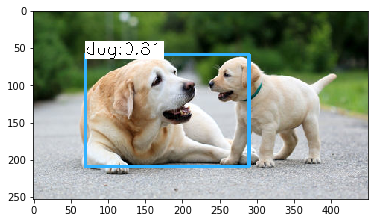

0 16


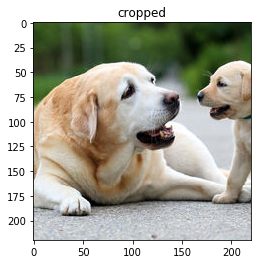

[2]


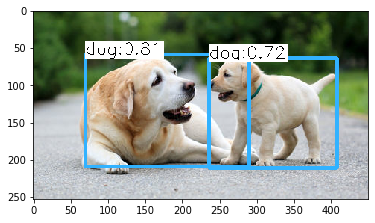

2 16


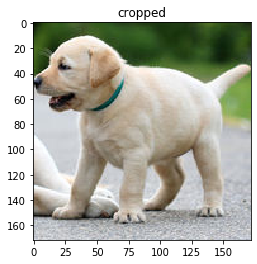

In [285]:
cap = cv.VideoCapture('./images/dog2.jpg')

hasFrame, frame = cap.read()
frame_crop = frame.copy()

#inpWidth =  frame.shape[1]
#inpHeight = frame.shape[0]
# 여기서 inpWidth는 영상의 크기가 아님.
blob = cv.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop=False)

net.setInput(blob)

outs = net.forward(getOutputsNames(net))

crop_postprocess(frame, outs)


# 6. dir에서 다양한 이미지에서 crop 자동화

## 6.1. 기본 사양

In [303]:
import cv2 as cv
import argparse
import numpy as np
import os.path
from matplotlib import pyplot as plt
%matplotlib inline


In [304]:
# Initialize the parameters
confThreshold = 0.5  #Confidence threshold
nmsThreshold = 0.4   #Non-maximum suppression threshold
inpWidth = 416       #Width of network's input image
inpHeight = 416      #Height of network's input image

# Load names of classes
classesFile = "coco.names"
classes = None
with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')
print(classes)
# Give the configuration and weight files for the model and load the network using them.
modelConfiguration = "yolov3.cfg"
modelWeights = "yolov3.weights"

net = cv.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv.dnn.DNN_TARGET_CPU)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [324]:
# Get the names of the output layers
def getOutputsNames(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [325]:
# Draw the predicted bounding box
def crop_drawPred(dog_dir,classId, conf, left, top, right, bottom):
    # Draw a bounding box.
    cv.rectangle(frame, (left, top), (right, bottom), (255, 178, 50), 3)
    
    label = '%.2f' % conf
        
    # Get the label for the class name and its confidence
    if classes:
        assert(classId < len(classes))
        label = '%s:%s' % (classes[classId], label)

    #Display the label at the top of the bounding box
    labelSize, baseLine = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    cv.rectangle(frame, (left, top - round(1.5*labelSize[1])), (left + round(1.5*labelSize[0]), top + baseLine), (255, 255, 255), cv.FILLED)
    cv.putText(frame, label, (left, top), cv.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1)
    imshow('', frame)  

In [360]:
# Remove the bounding boxes with low confidence using non-maxima suppression
def crop_postprocess(frame, outs,dog_dir,idx):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    # Scan through all the bounding boxes output from the network and keep only the
    # ones with high confidence scores. Assign the box's class label as the class with the highest score.
    classIds = []
    confidences = []
    boxes = []
    centerX=[]
    centerY=[]

    for out in outs:
        for detection in out:
            scores = detection[5:]
            classId = np.argmax(scores)
            confidence = scores[classId]
            if confidence > confThreshold:
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])
                centerX.append(center_x)
                centerY.append(center_y)

    # Perform non maximum suppression to eliminate redundant overlapping boxes with
    # lower confidences.
    print(boxes)
    indices = cv.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    print(len(indices))
    for i in indices:
        print(i)
        i = i[0]
        box = boxes[i]
        x = centerX[i]
        y = centerY[i]

        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
#         crop_drawPred(dog_dir,classIds[i], confidences[i], left, top, left + width, top + height)        
        crop_image(dog_dir,idx,i, classIds[i], confidences[i], left, top, width, height,x, y)
   
        

In [387]:
def crop_image(dog_dir,idx,i, classIds, confidences, left, top, width, height,x, y):
    print(i,classIds, width, height)
#     if classIds == 16:
    if width >= height:
        left = int(x - width / 2)
        top = int(y - width / 2)
        right= int(x + width / 2)
        bottom= int(y + width / 2)
    else:
        left = int(x - height / 2)
        top = int(y - height / 2)
        right= int(x + height / 2)
        bottom= int(y + height / 2)
    
    if left <0:
        margin = np.abs(left)
        left = 0
        top = int(top + margin/2)
        bottom = int(bottom - margin/2)
    
    if top <0:
        margin = np.abs(top)
        top = 0
        left = int(left + margin/2)
        right = int(right - margin/2)
    
    
    crop_img = frame_crop[top:bottom, left:right]
    crop_img = cv2.cvtColor(crop_img, cv2.COLOR_RGB2BGR)
    dir_new = dog_dir + '_crop'
    cv.imwrite(f"./images/dogs/{dir_new}/{dog_dir}{idx}_{i}.jpg", crop_img) 
    imshow("cropped", crop_img)

## 6.2. img_path

In [345]:
import os

In [336]:
base_path = os.path.join(os.getcwd(), 'images/dogs').replace('\\','/')
base_path

'C:/AI/OpenCV/Detection/images/dogs'

In [340]:
dogs_dir = os.listdir(base_path)
dogs_dir

['golden', 'sheepdog']

golden
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/AI/OpenCV/Detection/images/dogs\\golden_crop'
0 da9c540113614e9da5a86f0c4cb5f8ea.jpg
C:/AI/OpenCV/Detection/images/dogs\golden\da9c540113614e9da5a86f0c4cb5f8ea.jpg
[[330, 112, 262, 576], [89, 251, 265, 471]]
2
[0]
0 16 262 576
112 688 173 749
112 688 173 749
golden_crop


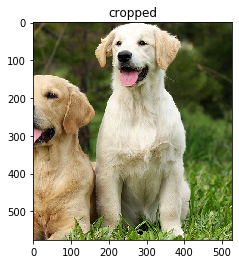

[1]
1 16 265 471
251 722 -13 457
257 715 0 457
golden_crop


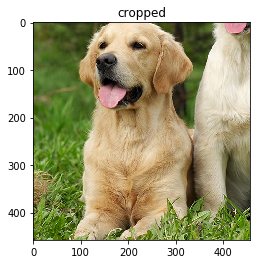

1 dff.jpg
C:/AI/OpenCV/Detection/images/dogs\golden\dff.jpg
[[20, 24, 151, 199]]
1
[0]
0 16 151 199
24 223 -3 195
25 221 0 195
golden_crop


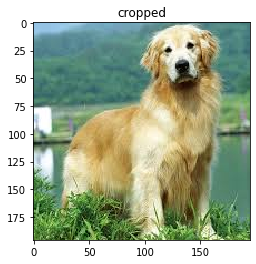

2 golden-retriever-1554779815-1024x735.jpg
C:/AI/OpenCV/Detection/images/dogs\golden\golden-retriever-1554779815-1024x735.jpg
[[160, 148, 280, 466], [405, 172, 243, 460], [630, 188, 265, 429]]
3
[1]
1 16 243 460
172 632 297 757
172 632 297 757
golden_crop


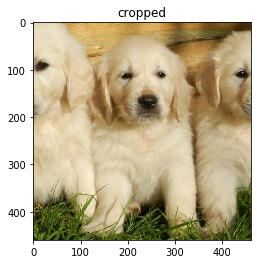

[2]
2 16 265 429
188 617 548 977
188 617 548 977
golden_crop


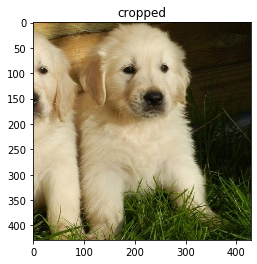

[0]
0 16 280 466
148 614 67 533
148 614 67 533
golden_crop


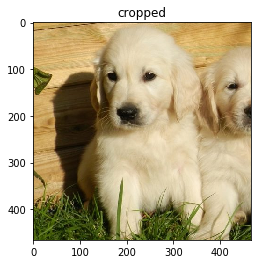

3 golden-retriever-sweetness.jpg
C:/AI/OpenCV/Detection/images/dogs\golden\golden-retriever-sweetness.jpg
[[48, 53, 164, 235]]
1
[0]
0 16 164 235
53 288 12 247
53 288 12 247
golden_crop


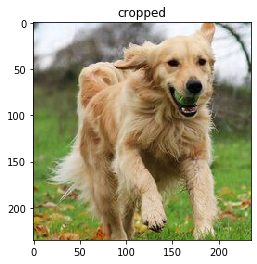

sheepdog
[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/AI/OpenCV/Detection/images/dogs\\sheepdog_crop'
0 81in3I4XoQL._AC_SX466_.jpg
C:/AI/OpenCV/Detection/images/dogs\sheepdog\81in3I4XoQL._AC_SX466_.jpg
[[57, 70, 356, 350]]
1
[0]
0 16 356 350
67 423 57 413
67 423 57 413
sheepdog_crop


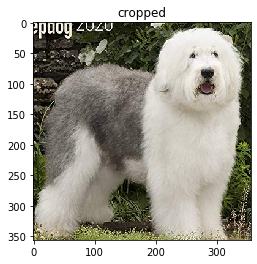

1 images (1).jpg
C:/AI/OpenCV/Detection/images/dogs\sheepdog\images (1).jpg
[[98, -1, 110, 102], [43, 44, 90, 111], [140, 21, 91, 158]]
3
[1]
1 16 90 111
44 155 32 143
44 155 32 143
sheepdog_crop


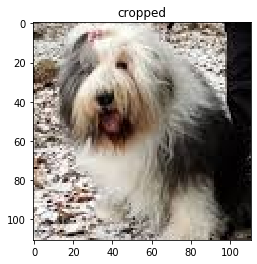

[2]
2 16 91 158
21 179 107 265
21 179 107 265
sheepdog_crop


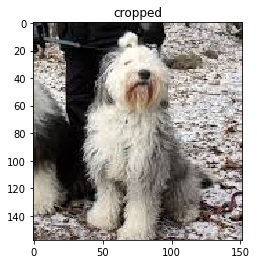

[0]
0 0 110 102
-5 105 98 208
0 105 100 205
sheepdog_crop


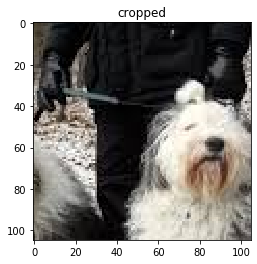

2 images (2).jpg
C:/AI/OpenCV/Detection/images/dogs\sheepdog\images (2).jpg
[[205, 2, 69, 119], [-1, 27, 59, 131], [138, 13, 85, 158], [0, 32, 144, 143], [139, 44, 83, 126]]
4
[4]
4 16 83 126
44 170 118 244
44 170 118 244
sheepdog_crop


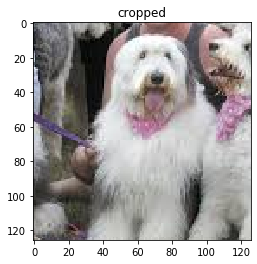

[3]
3 16 144 143
32 176 0 144
32 176 0 144
sheepdog_crop


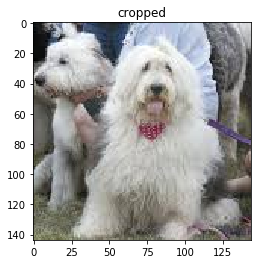

[0]
0 16 69 119
2 121 180 299
2 121 180 299
sheepdog_crop


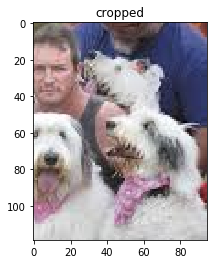

[1]
1 16 59 131
27 158 -37 93
45 139 0 93
sheepdog_crop


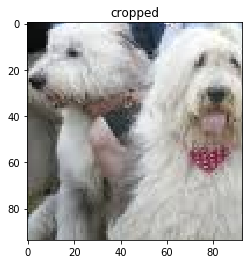

3 images.jpg
C:/AI/OpenCV/Detection/images/dogs\sheepdog\images.jpg
[[119, 28, 71, 103]]
1
[0]
0 21 71 103
28 131 103 206
28 131 103 206
sheepdog_crop


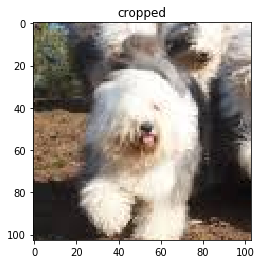

4 old-english-sheepdog-detail.jpg
C:/AI/OpenCV/Detection/images/dogs\sheepdog\old-english-sheepdog-detail.jpg
[]
0
5 sfsf.jpg
C:/AI/OpenCV/Detection/images/dogs\sheepdog\sfsf.jpg
[[194, -1, 65, 140], [70, 28, 83, 114], [6, 33, 70, 126], [161, 35, 97, 125]]
3
[1]
1 16 83 114
28 142 55 169
28 142 55 169
sheepdog_crop


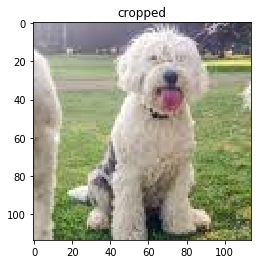

[3]
3 16 97 125
35 160 147 272
35 160 147 272
sheepdog_crop


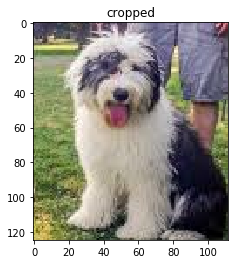

[2]
2 16 70 126
33 159 -22 104
44 148 0 104
sheepdog_crop


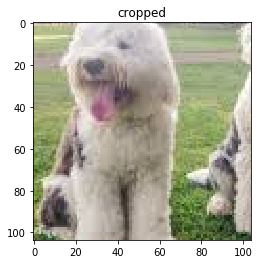

In [386]:
for dog_dir in dogs_dir:
    print(dog_dir)
    dir_path = os.path.join(base_path, dog_dir)
    try:
        new_dir = str(dog_dir) + '_crop'
        os.mkdir(os.path.join(base_path, new_dir))
    except Exception as err:
        print(err)
    img_list = os.listdir(dir_path)
    for idx, img_name in enumerate(img_list):
        print(idx, img_name)
        img_path = os.path.join(dir_path, img_name)
        print(img_path)
        img = cv2.imread(img_path, 1)
        frame =cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        frame_crop = frame.copy()
        blob = cv2.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop=False)

        net.setInput(blob)

        outs = net.forward(getOutputsNames(net))

        crop_postprocess(frame, outs, dog_dir, idx)
        
